# ****Predicting students dropout, academic success by using Machine Learning Algoritm

# Importing Libraries

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import zipfile
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from scipy import stats



## downloading the dataset from kaggle

In [145]:
!pip install kaggle


     ---------------------------------------- 0.0/84.5 kB ? eta -:--:--
     --------- ---------------------------- 20.5/84.5 kB 217.9 kB/s eta 0:00:01
     --------------------------- ---------- 61.4/84.5 kB 273.8 kB/s eta 0:00:01
     --------------------------- ---------- 61.4/84.5 kB 273.8 kB/s eta 0:00:01
     ------------------------------------ - 81.9/84.5 kB 269.5 kB/s eta 0:00:01
     -------------------------------------- 84.5/84.5 kB 238.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.3-py3-none-any.whl size=111932 sha256=75d888b84c83a4ee98e109d1a71c1b1fee40a0ca12c4ba94a961ea1761312cff
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\c5\94\5b\08d5bb9b7b78401fa26da264ef32d72bfbd9cb74641c65169b
Successfully built kaggle


In [4]:
!mkdir C:\Users\ADMIN\.kaggle
!move kaggle.json C:\Users\ADMIN\.kaggle

A subdirectory or file C:\Users\ADMIN\.kaggle already exists.
The system cannot find the file specified.


In [5]:
!icacls C:\Users\ADMIN\.kaggle\kaggle.json /inheritance:r
!icacls C:\Users\ADMIN\.kaggle\kaggle.json /grant:r "%username%:R"

processed file: C:\Users\ADMIN\.kaggle\kaggle.json
Successfully processed 1 files; Failed processing 0 files
processed file: C:\Users\ADMIN\.kaggle\kaggle.json
Successfully processed 1 files; Failed processing 0 files


In [9]:
!kaggle datasets download -d thedevastator/higher-education-predictors-of-student-retention -p C:\Users\ADMIN\Downloads

higher-education-predictors-of-student-retention.zip: Skipping, found more recently modified local copy (use --force to force download)


In [16]:
# Unzip the downloaded file using zipfile
zip_path = r"C:\Users\ADMIN\Downloads\higher-education-predictors-of-student-retention.zip"
extract_path = r"C:\Users\ADMIN\Downloads"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# **data loading**

In [28]:
dataset_path = r"C:\Users\ADMIN\Downloads\dataset.csv"  # Replace with the actual path to your CSV file
df = pd.read_csv(dataset_path)
#view the data
df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [29]:
df.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,5,1,15,1,1,9,23,27,6,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


# Exploratory Data Analysis

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [26]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [65]:
df.duplicated().sum()

0

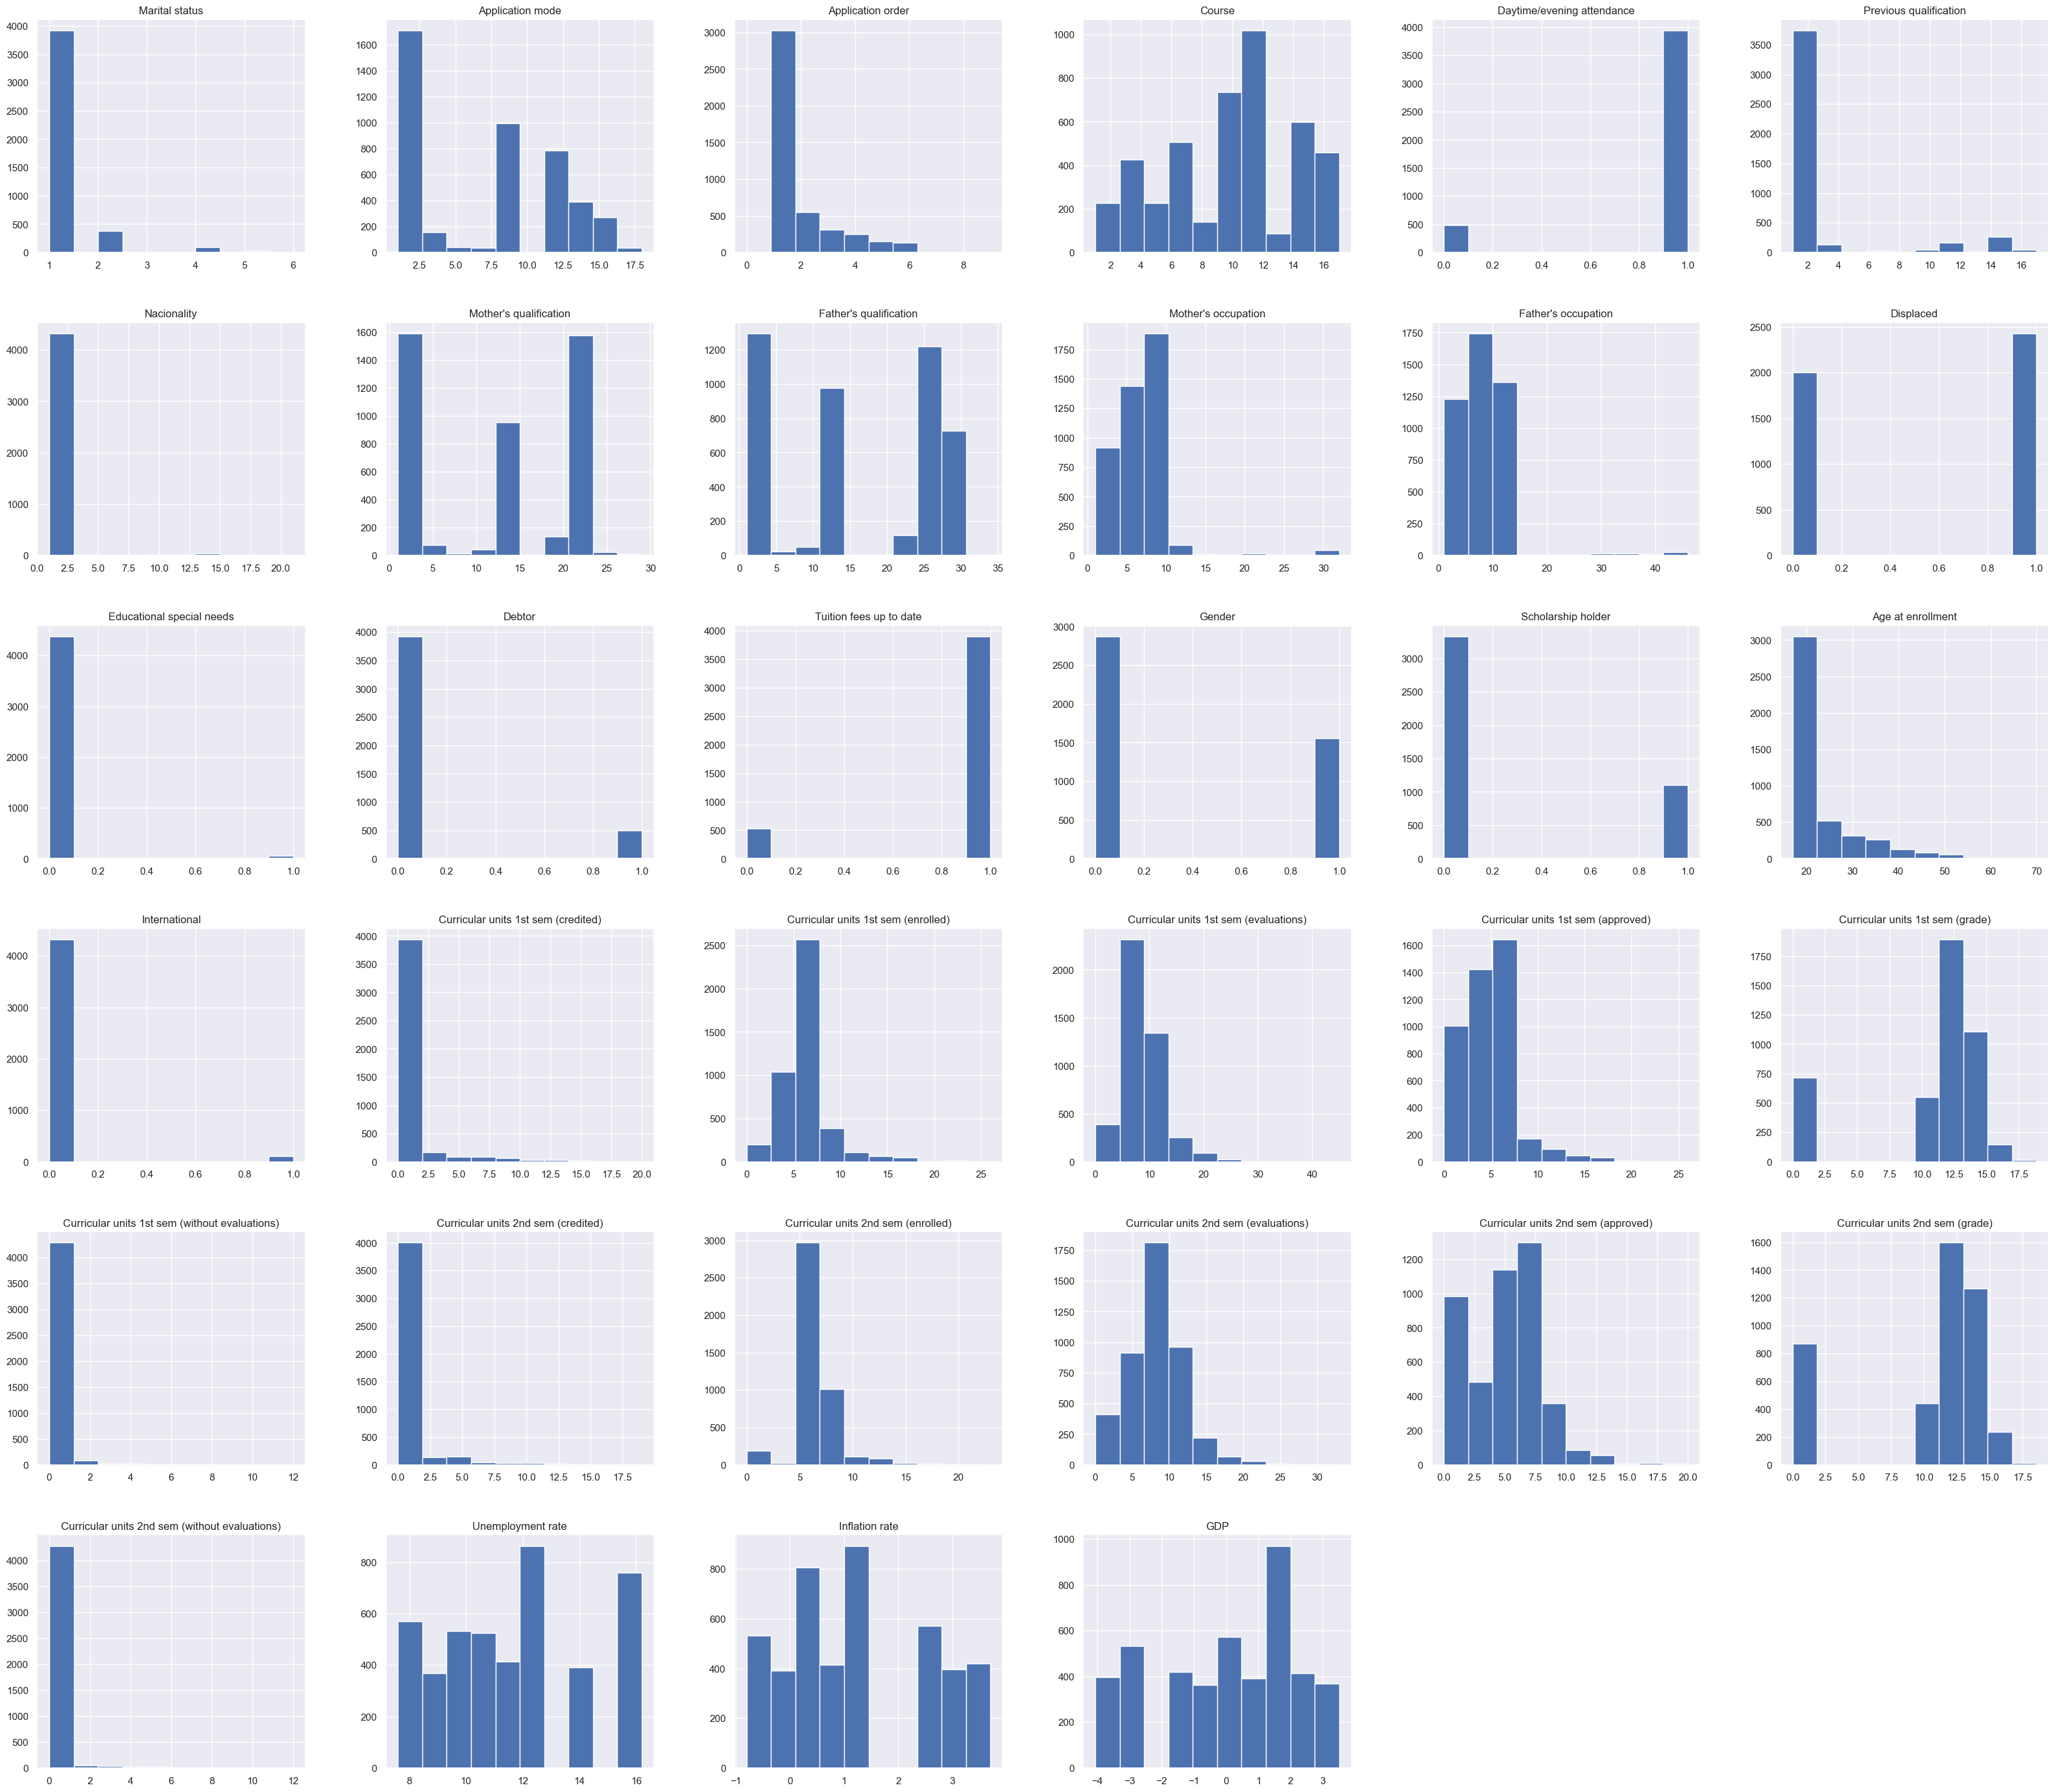

In [69]:

#histogram - visual representation
sns.set_theme(style = 'darkgrid')
df.hist(bins=10, figsize=(40, 35), grid=True, legend=None);

In [30]:
#count of unique values in each column

def unique_values(feature):
    
    print("unique values of"+feature)
    print(df.loc[:,feature].value_counts())
    print('\n')
    
for i in df.columns:
    unique_values(i)

unique values ofMarital status
Marital status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64


unique values ofApplication mode
Application mode
1     1708
8      872
12     785
14     312
15     213
4      139
9      124
13      77
16      59
7       38
17      35
6       30
3       16
5       10
2        3
18       1
10       1
11       1
Name: count, dtype: int64


unique values ofApplication order
Application order
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: count, dtype: int64


unique values ofCourse
Course
12    766
9     380
10    355
6     337
15    331
14    268
17    268
11    252
5     226
2     215
3     215
4     210
16    192
7     170
8     141
13     86
1      12
Name: count, dtype: int64


unique values ofDaytime/evening attendance
Daytime/evening attendance
1    3941
0     483
Name: count, dtype: int64


unique values ofPrevious qualification
Previous qualification
1     3717
14     219


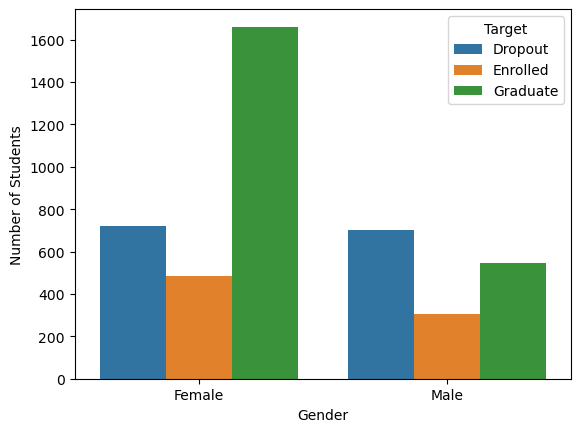

In [32]:
#Genderwise no of students counting
sns.countplot(data=df, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()

In [33]:
s_df=df.copy()
s_df.shape

(4424, 35)

# labelencoding

In [34]:
s_df['Target'] = LabelEncoder().fit_transform(s_df['Target'])
s_df.loc[:,'Target'].value_counts()


Target
2    2209
0    1421
1     794
Name: count, dtype: int64

# identifying outliers

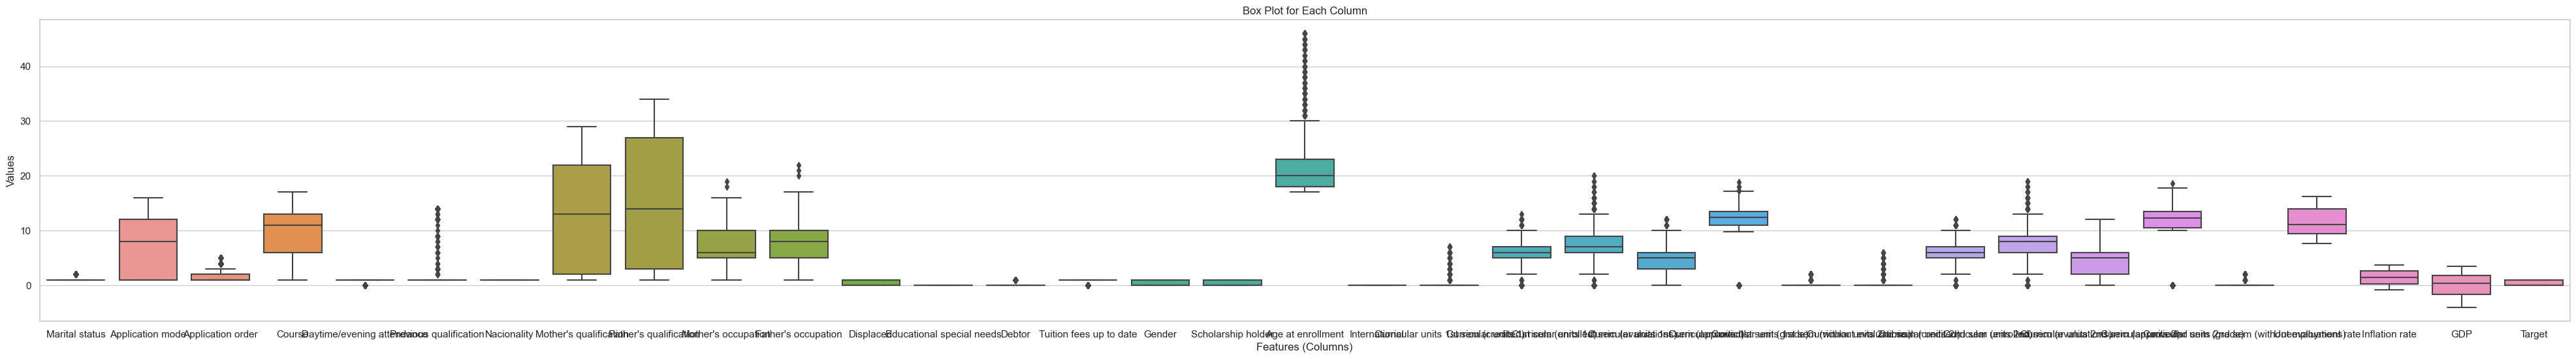

In [93]:

sns.set(style="whitegrid")

# Create a box plot for each column (feature)
plt.figure(figsize=(50, 6))  # Adjust the figure size as needed
sns.boxplot(data=s_df)
plt.title('Box Plot for Each Column')
plt.xlabel('Features (Columns)')
plt.ylabel('Values')
plt.show()

In [38]:
# Calculating the Z-score for each data point
z_scores = np.abs(stats.zscore(s_df))

# Finding data points with a Z-score greater than 3
outliers = np.where(z_scores > 3)

# Printing the indices of the outliers
outliers

(array([   5,    5,    8, ..., 4420, 4423, 4423], dtype=int64),
 array([17, 30,  6, ..., 18,  6, 18], dtype=int64))

In [39]:
# Dropping the corresponding rows from the dataframe
out_df = s_df.drop(s_df.index[outliers[0]])

# Resetting the index of the dataframe
s_df = out_df.reset_index(drop=True)
s_df.shape
s_df


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3532,1,1,1,8,1,1,1,3,28,4,...,0,5,8,5,11.600000,0,9.4,-0.8,-3.12,2
3533,1,1,1,5,1,1,1,1,1,10,...,0,6,6,6,13.500000,0,16.2,0.3,-0.92,2
3534,1,15,1,5,1,14,1,3,28,4,...,5,9,10,7,13.142857,1,16.2,0.3,-0.92,2
3535,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0


In [40]:
# Changing the Target to numerical Value 0 or 1. 
#We are predicting if a Student is gonna Dropout or Graduate, ignoring the ones who are Enrolled.
s_df.drop(s_df[s_df["Target"]==1].index, inplace=True)
s_df.loc[:,'Target'].value_counts()

Target
2    1791
0    1116
Name: count, dtype: int64

In [41]:

# mapping integer codes to new values
mapping = {0: 1, 2: 0}
s_df["Target"] = s_df["Target"].replace(mapping)

s_df.loc[:,'Target'].value_counts()

Target
0    1791
1    1116
Name: count, dtype: int64

In [85]:

x = s_df.drop(columns=['Target'], axis=1)
y = s_df["Target"]

     

# Split data into training and testing sets

In [81]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)


In [ ]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X_train)

# By Using Logistic regression

In [83]:
model = LogisticRegression(max_iter=1000)

# Initializing the RFE method with the logistic regression model
rfe = RFE(model, n_features_to_select=1)

# Fitting the RFE model to the training data
fit = rfe.fit(X_train, y_train)

# Getting the ranking of features
ranking = fit.ranking_

print("Feature Ranking:", ranking)

Feature Ranking: [ 9 26 17 14 12 25 32 29 30 28 31 10 33  3  1  8  2 23 34 11  7 27  6 15
 13 18  5 22  4 16 19 20 24 21]


In [86]:
# Getting the selected features based on ranking
selected_features = X_train.columns[ranking <= 10]

print("Selected Features:", selected_features)


Selected Features: Index(['Marital status', 'Displaced', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)'],
      dtype='object')


In [87]:
# Training logistic regression model using the selected features
model.fit(X_train[selected_features], y_train)

y_pred = model.predict(X_test[selected_features])

# Evaluating the model on the test set
accuracy = model.score(X_test[selected_features], y_test)
print("Model Accuracy on Test Set:", accuracy)

Model Accuracy on Test Set: 0.9192439862542955


In [88]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test, y_pred))

# calculating confusion matrix
print(confusion_matrix(y_test, y_pred))
#calculating accuracy
print(accuracy_score(y_test,y_pred))




CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       353
           1       0.97      0.82      0.89       229

    accuracy                           0.92       582
   macro avg       0.93      0.90      0.91       582
weighted avg       0.92      0.92      0.92       582

[[348   5]
 [ 42 187]]
0.9192439862542955
